[*********************100%***********************]  1 of 1 completed
Epoch 1/10
116/116 [==============================] - 10s 58ms/step - loss: 0.0015
Epoch 2/10
116/116 [==============================] - 8s 65ms/step - loss: 5.4544e-05
Epoch 3/10
116/116 [==============================] - 8s 73ms/step - loss: 5.2344e-05
Epoch 4/10
116/116 [==============================] - 9s 82ms/step - loss: 5.4421e-05
Epoch 5/10
116/116 [==============================] - 9s 79ms/step - loss: 5.2905e-05
Epoch 6/10
116/116 [==============================] - 10s 85ms/step - loss: 4.7222e-05
Epoch 7/10
116/116 [==============================] - 10s 85ms/step - loss: 4.5404e-05
Epoch 8/10
116/116 [==============================] - 10s 84ms/step - loss: 4.7035e-05
Epoch 9/10
116/116 [==============================] - 10s 87ms/step - loss: 5.1522e-05
Epoch 10/10
27/27 [==============================] - 2s 26ms/step


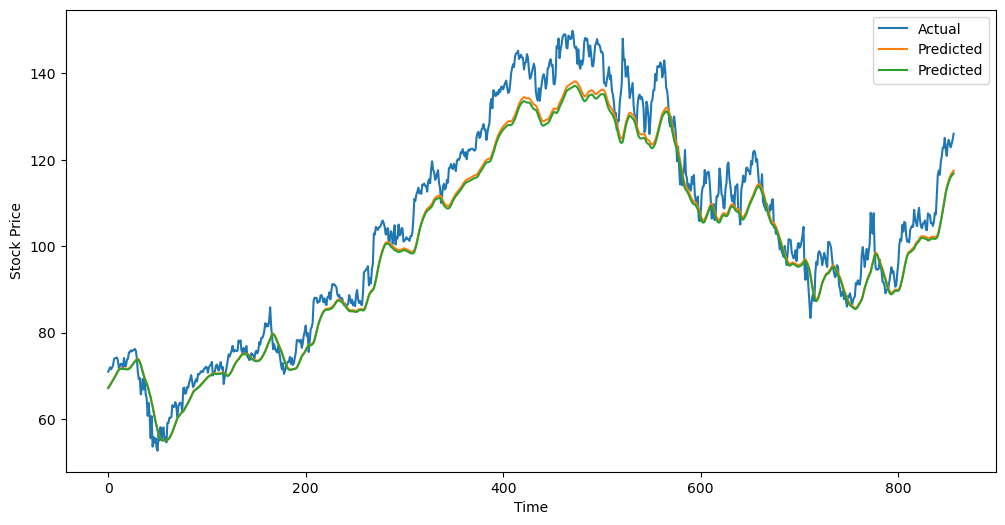

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the ticker symbol for Google (Alphabet Inc.)
ticker = 'GOOGL'

# Download historical stock price data from Yahoo Finance
data = yf.download(ticker, start='2000-01-01', end='2023-06-06')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create the dataset with a specified lookback
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i+lookback), 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

# Create the dataset with a lookback of 90 days
lookback = 90
X_train, y_train = create_dataset(train_data, lookback)
X_test, y_test = create_dataset(test_data, lookback)

# Reshape the input data to be 3-dimensional [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=2))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].values[train_size + lookback:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()